# Gusian process understanding with scikit learn
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html

In [32]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 사전확률과 사후확률

In [33]:
import numpy as np

def target_generator(X, add_noise=False):
    target = 0.5 + np.sin(3 * X)
    if add_noise:
        rng = np.random.RandomState(1)
        target += rng.normal(0, 0.3, size=target.shape)
    return target.squeeze()

In [34]:
X = np.linspace(0, 5, num=30).reshape(-1, 1)
y = target_generator(X, add_noise=False)

Text(0.5, 0, 'X')

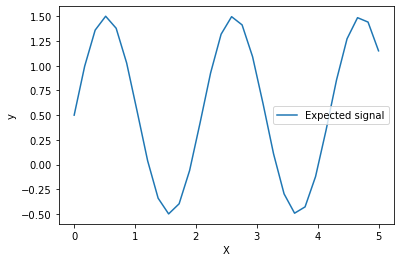

In [35]:
import matplotlib.pyplot as plt

plt.plot(X, y, label="Expected signal")
plt.legend()
plt.xlabel("X")
_ = plt.ylabel("y")

In [36]:
rng = np.random.RandomState(0)
X_train = rng.uniform(0, 5, size=20).reshape(-1, 1)
y_train = target_generator(X_train, add_noise=True)

Text(0.5, 0, 'X')

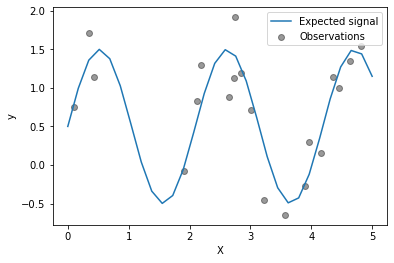

In [37]:
plt.plot(X, y, label="Expected signal")
plt.scatter(
    x=X_train[:, 0],
    y=y_train,
    color="black",
    alpha=0.4,
    label="Observations",
)
plt.legend()
plt.xlabel("X")
_ = plt.ylabel("y")

In [38]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1, noise_level_bounds=(1e-5, 1e1)
)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X, return_std=True)

GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1))

In [39]:
y
y_mean
y_std

array([ 0.5       ,  0.99448427,  1.35959818,  1.49981813,  1.37845883,
        1.02727112,  0.53813513,  0.03902197, -0.33948697, -0.49836358,
       -0.39604148, -0.05929088,  0.42378522,  0.92680116,  1.31815446,
        1.49545659,  1.41232056,  1.09049698,  0.61418355,  0.10799663,
       -0.29563168, -0.49110139, -0.42727238, -0.12084402,  0.3480138 ,
        0.85663529,  1.27195141,  1.48530433,  1.44087518,  1.15028784])

array([0.74665488, 0.74665459, 0.74665428, 0.74665394, 0.74665359,
       0.74665321, 0.74665281, 0.74665239, 0.74665195, 0.74665148,
       0.74665099, 0.74665048, 0.74664995, 0.7466494 , 0.74664882,
       0.74664822, 0.7466476 , 0.74664696, 0.74664629, 0.7466456 ,
       0.74664489, 0.74664416, 0.74664341, 0.74664263, 0.74664183,
       0.74664101, 0.74664017, 0.7466393 , 0.74663841, 0.7466375 ])

array([0.74139647, 0.7413961 , 0.74139576, 0.74139544, 0.74139514,
       0.74139486, 0.74139461, 0.74139437, 0.74139417, 0.74139398,
       0.74139381, 0.74139367, 0.74139355, 0.74139345, 0.74139338,
       0.74139333, 0.7413933 , 0.74139329, 0.7413933 , 0.74139334,
       0.7413934 , 0.74139348, 0.74139358, 0.74139371, 0.74139386,
       0.74139403, 0.74139422, 0.74139444, 0.74139467, 0.74139493])

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

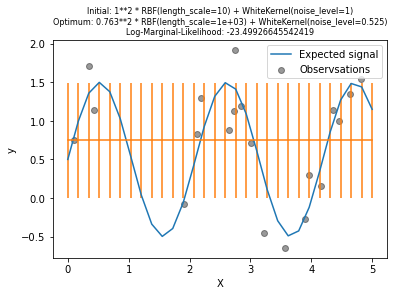

In [40]:
plt.plot(X, y, label="Expected signal")
plt.scatter(x=X_train[:, 0], y=y_train, color="black", alpha=0.4, label="Observsations")
plt.errorbar(X, y_mean, y_std)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
_ = plt.title(
    f"Initial: {kernel}\nOptimum: {gpr.kernel_}\nLog-Marginal-Likelihood: "
    f"{gpr.log_marginal_likelihood(gpr.kernel_.theta)}",
    fontsize=8,
)

In [41]:
kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1, noise_level_bounds=(1e-5, 1e1)
)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X, return_std=True)

GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1))

In [42]:
kernel = 1.0 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1)
)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X, return_std=True)

GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

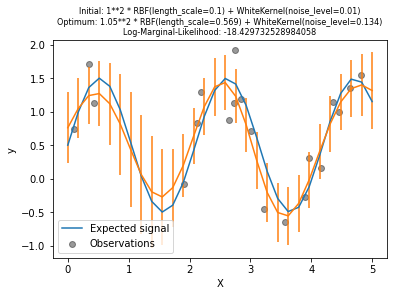

In [43]:
plt.plot(X, y, label="Expected signal")
plt.scatter(x=X_train[:, 0], y=y_train, color="black", alpha=0.4, label="Observations")
plt.errorbar(X, y_mean, y_std)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
_ = plt.title(
    f"Initial: {kernel}\nOptimum: {gpr.kernel_}\nLog-Marginal-Likelihood: "
    f"{gpr.log_marginal_likelihood(gpr.kernel_.theta)}",
    fontsize=8,
)

# End